In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('waterquality.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame to verify
print(df.head())


            Salinity (ppt)  DissolvedOxygen (mg/L)   pH  SecchiDepth (m)  \
Date                                                                       
1989-05-11             NaN                     NaN  7.5              0.3   
1989-05-18             NaN                    12.0  7.5              0.2   
1989-05-25             NaN                     NaN  8.0              0.4   
1989-06-01             NaN                    12.0  8.0              0.4   
1989-07-11             NaN                     NaN  8.5              0.3   

            WaterDepth (m)  WaterTemp (C)  AirTemp (C)  
Date                                                    
1989-05-11             0.9           17.0   -17.777778  
1989-05-18             0.6           17.5    20.500000  
1989-05-25             0.8           23.0    25.000000  
1989-06-01             0.9           25.5    29.000000  
1989-07-11             0.9           28.5    28.000000  


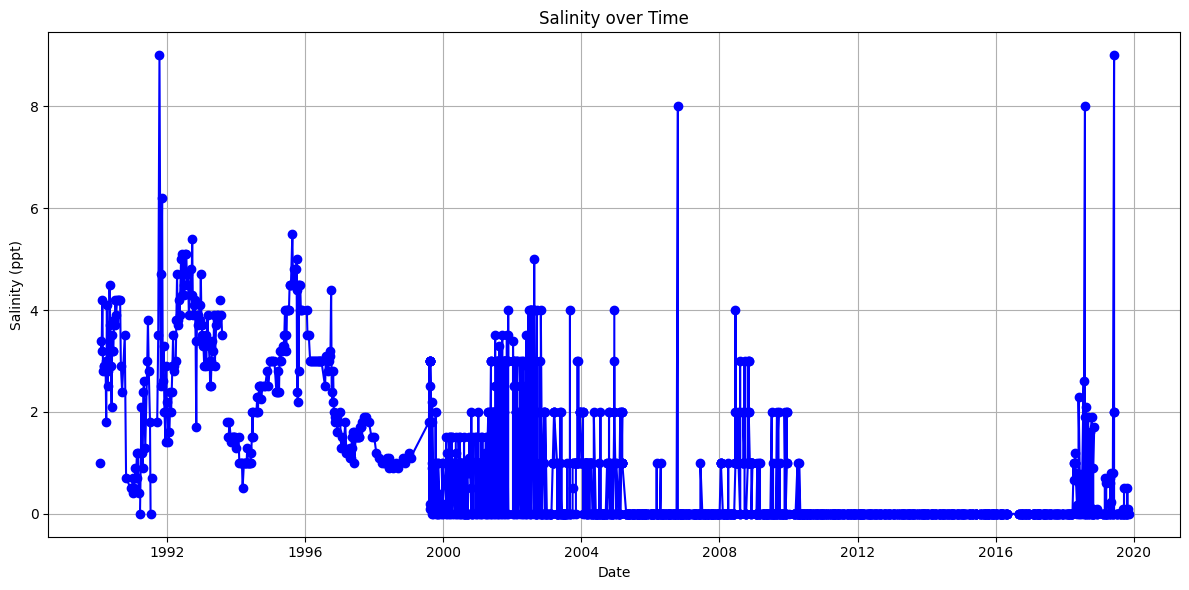

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Salinity (ppt)'], marker='o', linestyle='-', color='b')
plt.title('Salinity over Time')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.grid(True)
plt.tight_layout()
plt.show()


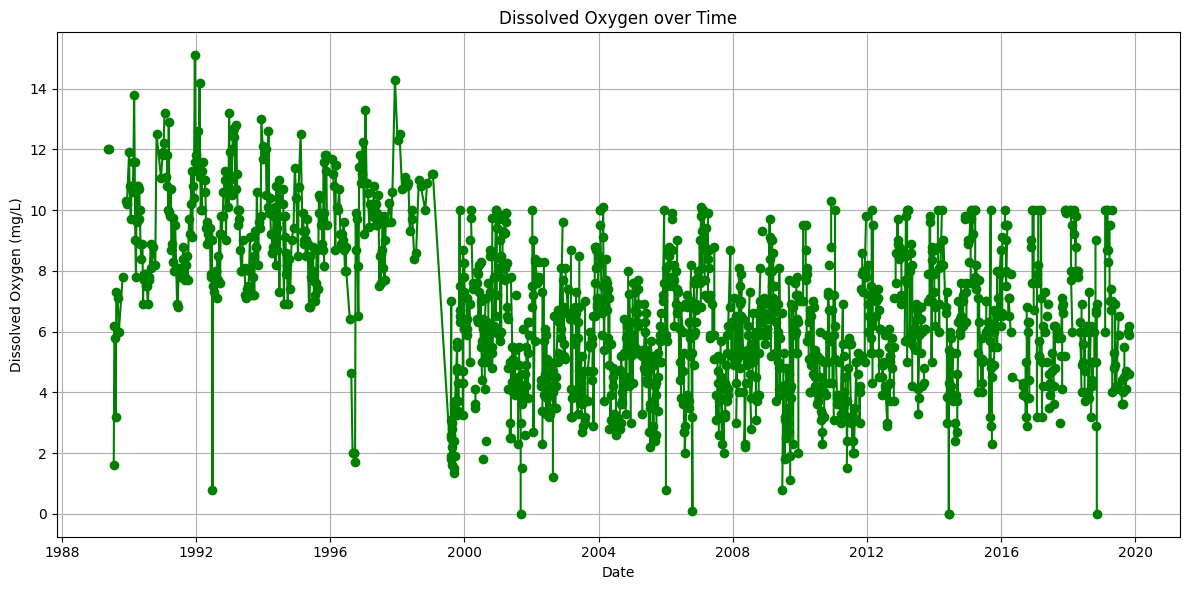

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['DissolvedOxygen (mg/L)'], marker='o', linestyle='-', color='g')
plt.title('Dissolved Oxygen over Time')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.grid(True)
plt.tight_layout()
plt.show()


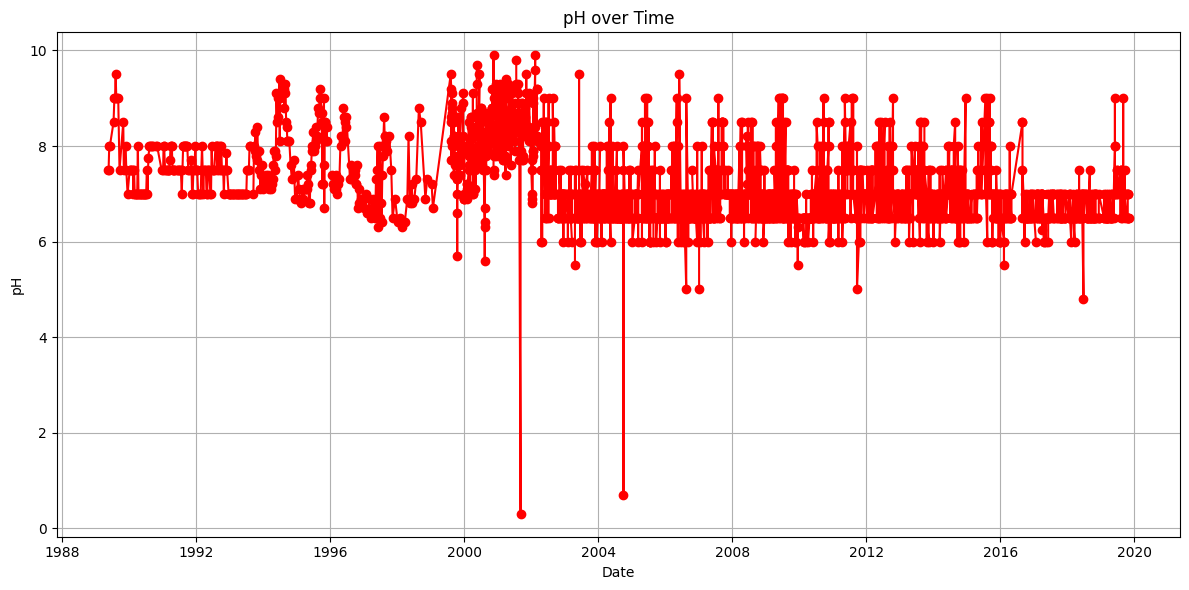

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pH'], marker='o', linestyle='-', color='r')
plt.title('pH over Time')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.tight_layout()
plt.show()


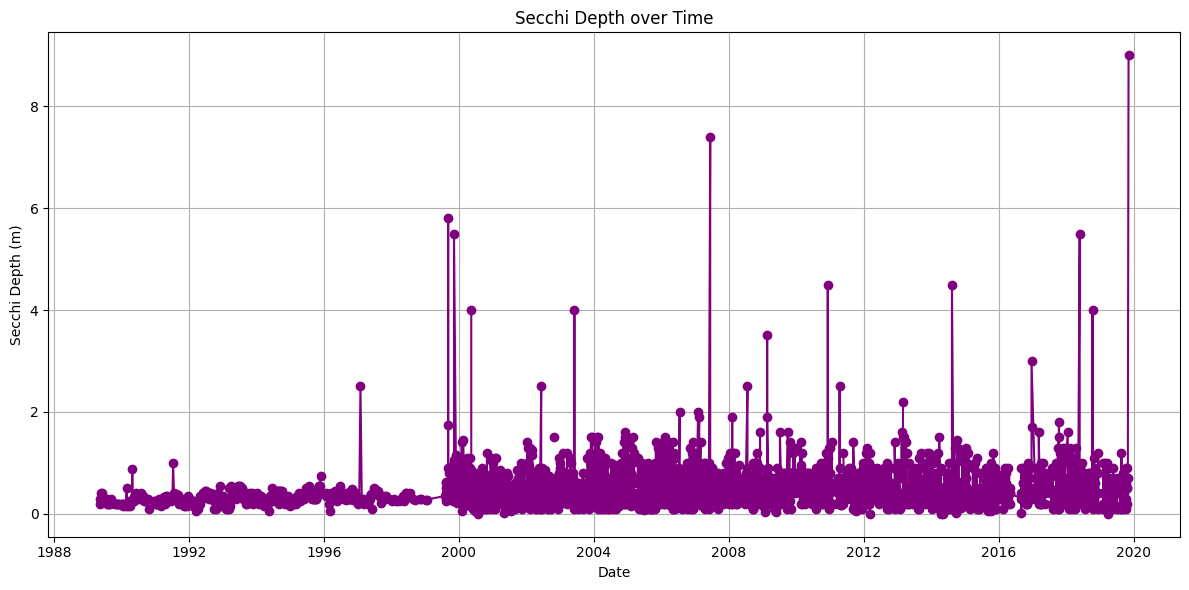

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SecchiDepth (m)'], marker='o', linestyle='-', color='purple')
plt.title('Secchi Depth over Time')
plt.xlabel('Date')
plt.ylabel('Secchi Depth (m)')
plt.grid(True)
plt.tight_layout()
plt.show()


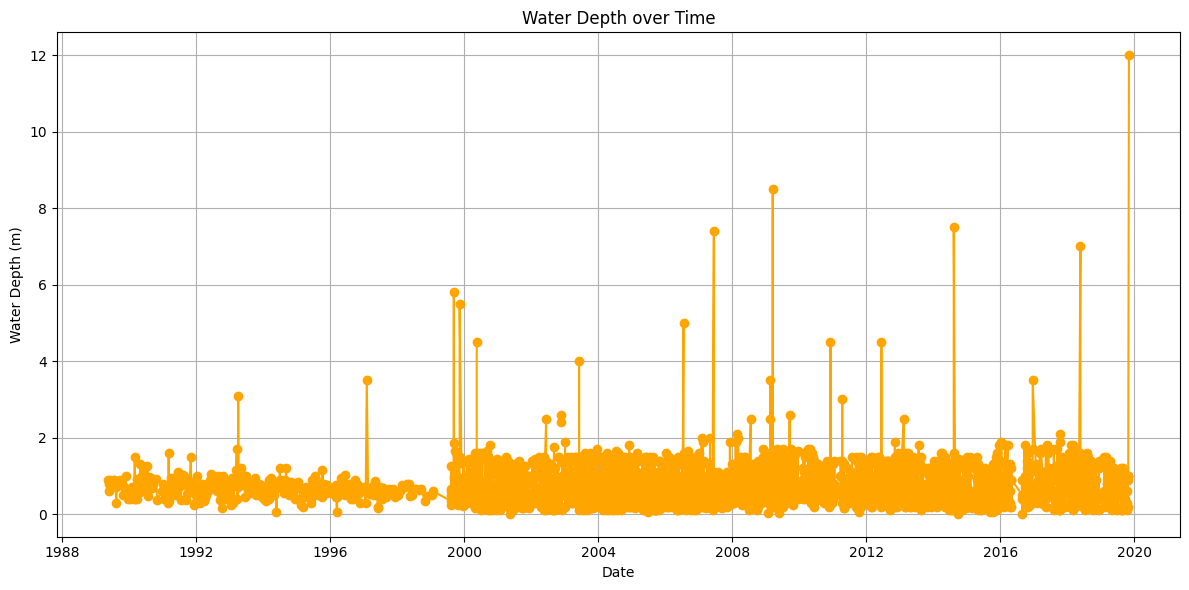

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['WaterDepth (m)'], marker='o', linestyle='-', color='orange')
plt.title('Water Depth over Time')
plt.xlabel('Date')
plt.ylabel('Water Depth (m)')
plt.grid(True)
plt.tight_layout()
plt.show()


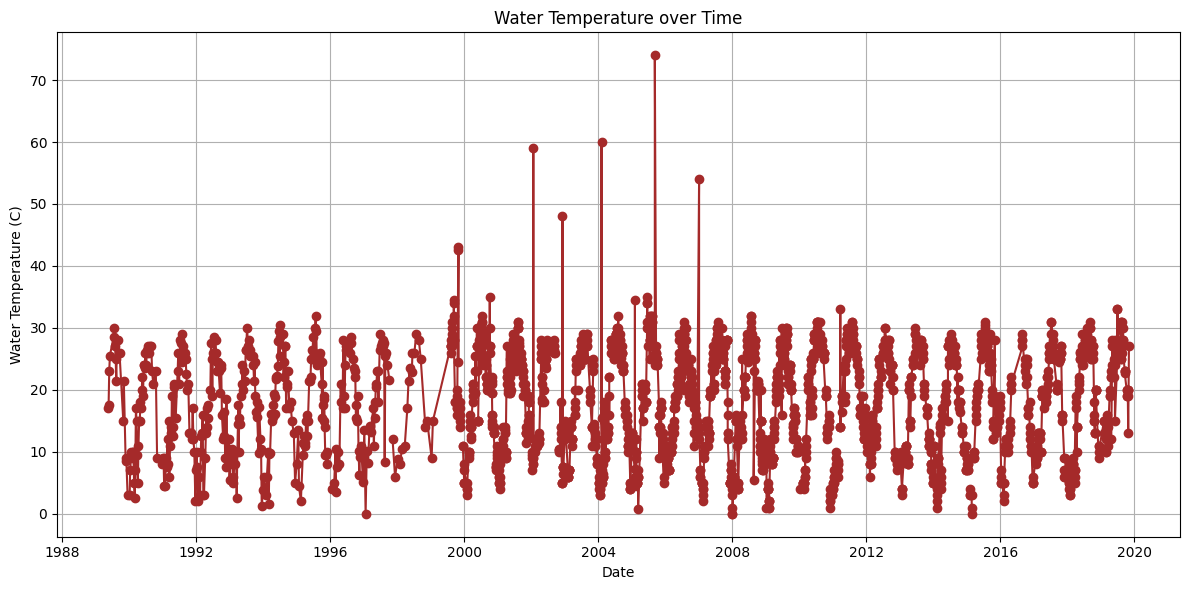

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['WaterTemp (C)'], marker='o', linestyle='-', color='brown')
plt.title('Water Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Water Temperature (C)')
plt.grid(True)
plt.tight_layout()
plt.show()


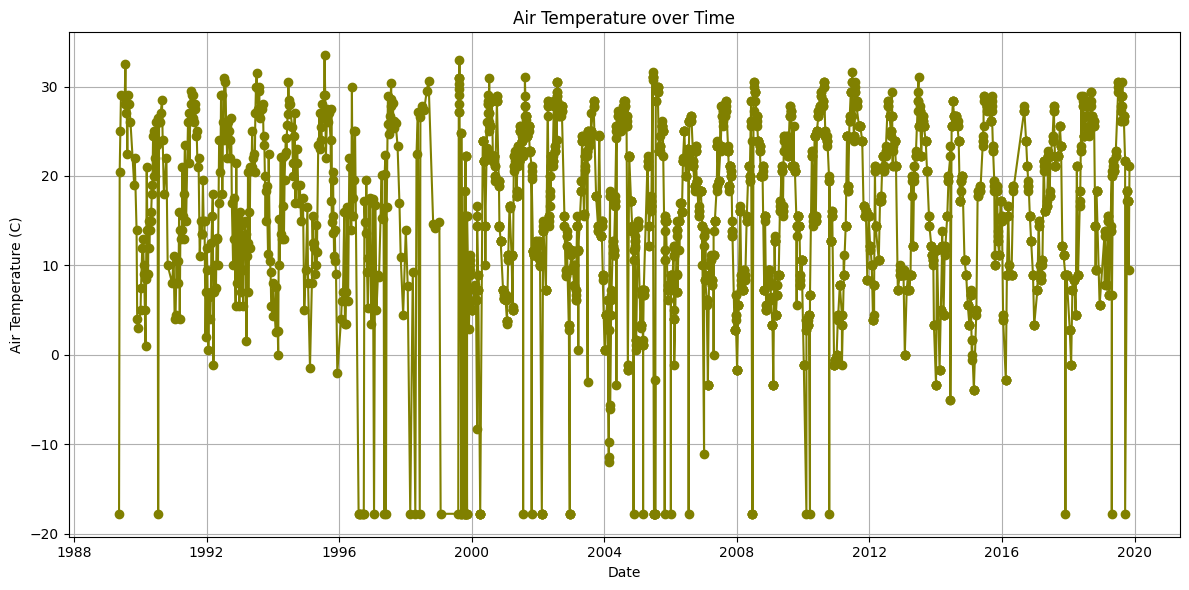

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AirTemp (C)'], marker='o', linestyle='-', color='olive')
plt.title('Air Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Air Temperature (C)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('waterquality.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Fill missing values if any (optional)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the parameter for which you want to make the forecast (e.g., Dissolved Oxygen)
parameter = 'DissolvedOxygen (mg/L)'
data = df[[parameter]].copy()


In [ ]:
caf# Split data into train and test sets
train_data = data.iloc[:-60]  # Use data up to the last 60 months as training data
test_data = data.iloc[-60:]   # Use the last 60 months as test data

# Fit SARIMA model
order = (1, 1, 1)       # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:             DissolvedOxygen (mg/L)   No. Observations:                 2311
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4047.897
Date:                            Mon, 17 Jun 2024   AIC                           8105.794
Time:                                    23:32:27   BIC                           8134.493
Sample:                                         0   HQIC                          8116.258
                                           - 2311                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4004      0.029     13.583      0.000       0.343       0.458
ma.L1         -0.8054      0.019   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


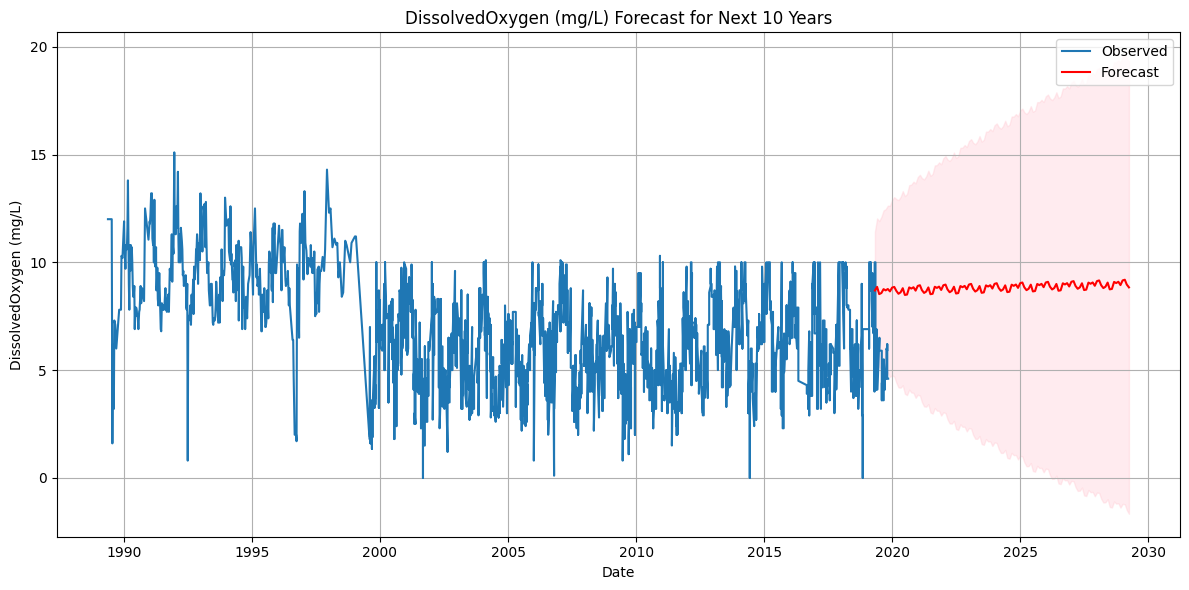

In [ ]:
# Forecast for the next 120 months (10 years)
forecast_steps = 120
forecast = results.get_forecast(steps=forecast_steps)

# Extracting forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Adding date index for forecasted values
forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[parameter], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'{parameter} Forecast for Next 10 Years')
plt.xlabel('Date')
plt.ylabel(parameter)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


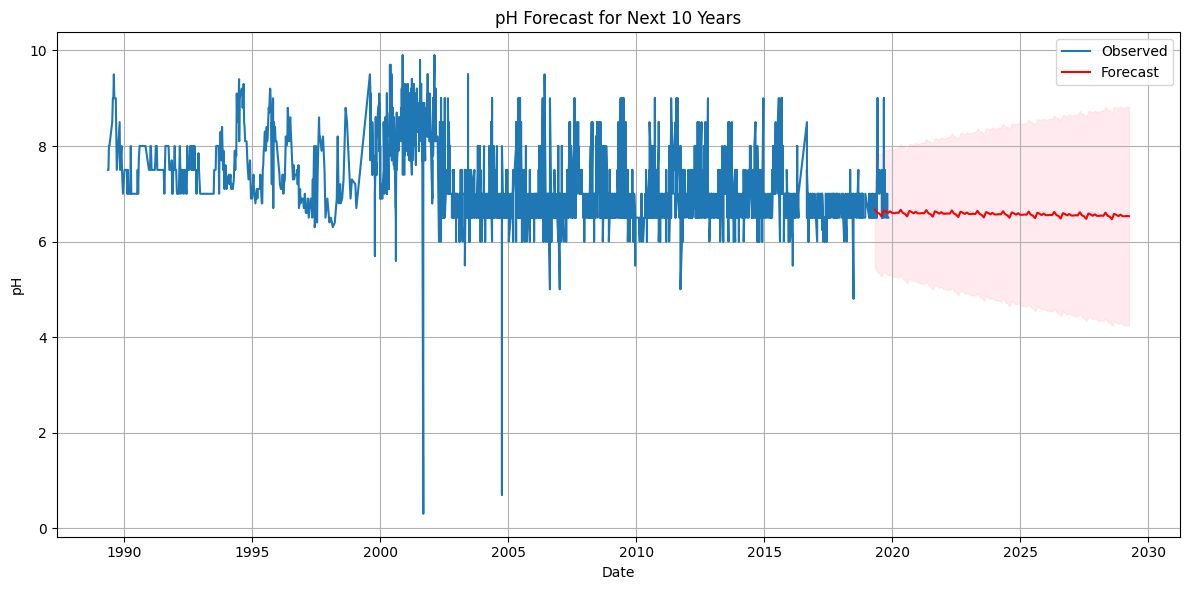

In [ ]:
parameter = 'pH'
data = df[[parameter]].copy()
# Define a function to perform forecasting for each parameter
def forecast_parameter(parameter):
    data = df[[parameter]].copy()

    # Split data into train and test sets
    train_data = data.iloc[:-60]  # Use data up to the last 60 months as training data
    test_data = data.iloc[-60:]   # Use the last 60 months as test data

    # Fit SARIMA model
    order = (1, 1, 1)       # (p, d, q)
    seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Forecast for the next 120 months (10 years)
    forecast_steps = 120
    forecast = results.get_forecast(steps=forecast_steps)

    # Extracting forecasted values
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Adding date index for forecasted values
    forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
    forecast_mean.index = forecast_index
    forecast_ci.index = forecast_index

    # Plotting the forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[parameter], label='Observed')
    plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'{parameter} Forecast for Next 10 Years')
    plt.xlabel('Date')
    plt.ylabel(parameter)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
forecast_parameter('pH')


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('waterquality.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Fill missing values if any (optional)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the 'SecchiDepth (m)' parameter for forecasting
parameter = 'SecchiDepth (m)'
data = df[[parameter]].copy()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                    SecchiDepth (m)   No. Observations:                 2311
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1411.560
Date:                            Mon, 17 Jun 2024   AIC                           2833.121
Time:                                    23:45:37   BIC                           2861.820
Sample:                                         0   HQIC                          2843.584
                                           - 2311                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0376      0.014      2.651      0.008       0.010       0.065
ma.L1         -0.9839      0.004   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


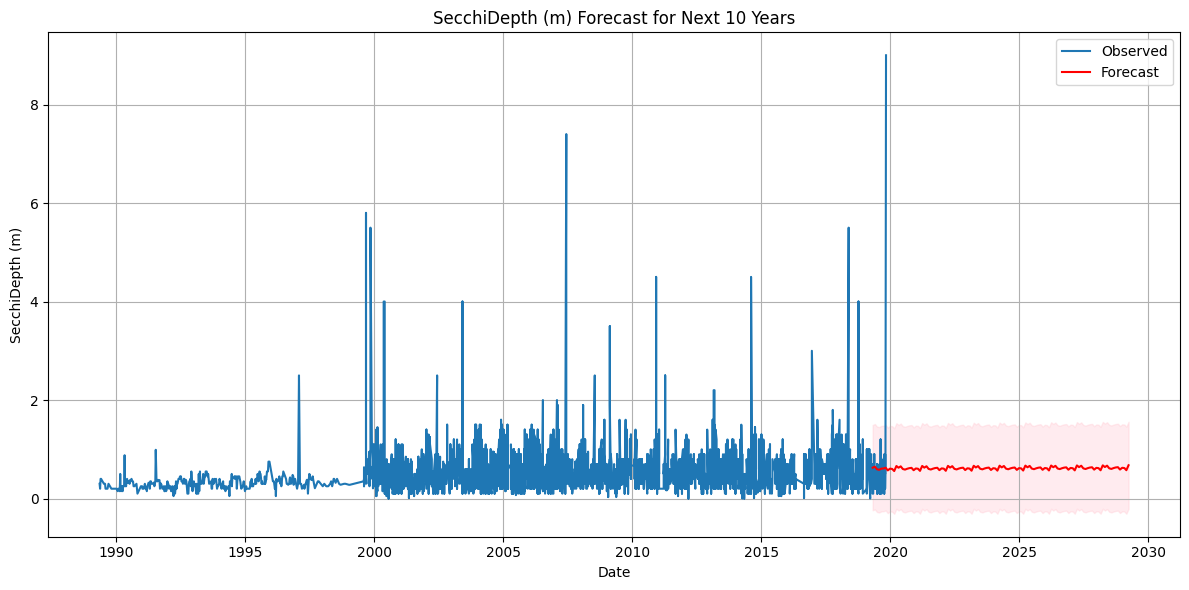

In [ ]:
# Split data into train and test sets
train_data = data.iloc[:-60]  # Use data up to the last 60 months as training data
test_data = data.iloc[-60:]   # Use the last 60 months as test data

# Fit SARIMA model
order = (1, 1, 1)       # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())

# Forecast for the next 120 months (10 years)
forecast_steps = 120
forecast = results.get_forecast(steps=forecast_steps)

# Extracting forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Adding date index for forecasted values
forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[parameter], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'{parameter} Forecast for Next 10 Years')
plt.xlabel('Date')
plt.ylabel(parameter)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('waterquality.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Fill missing values if any (optional)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the 'WaterDepth (m)' parameter for forecasting
parameter = 'WaterDepth (m)'
data = df[[parameter]].copy()
# Split data into train and test sets
train_data = data.iloc[:-120]  # Use data up to the last 120 months as training data (10 years)
test_data = data.iloc[-120:]   # Use the last 120 months as test data

# Fit SARIMA model
order = (1, 1, 1)       # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     WaterDepth (m)   No. Observations:                 2251
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2011.641
Date:                            Mon, 17 Jun 2024   AIC                           4033.282
Time:                                    23:49:06   BIC                           4061.848
Sample:                                         0   HQIC                          4043.711
                                           - 2251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0110      0.016     -0.678      0.498      -0.043       0.021
ma.L1         -0.9996      0.018   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


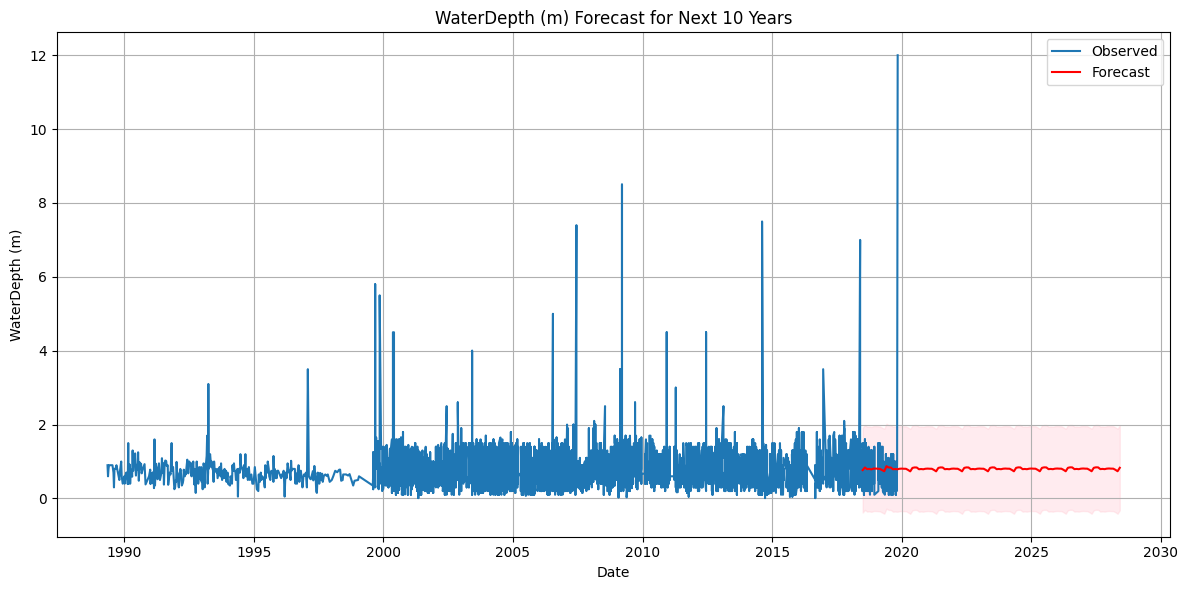

In [ ]:
# Forecast for the next 120 months (10 years)
forecast_steps = 120
forecast = results.get_forecast(steps=forecast_steps)

# Extracting forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Adding date index for forecasted values
forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[parameter], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'{parameter} Forecast for Next 10 Years')
plt.xlabel('Date')
plt.ylabel(parameter)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('waterquality.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Fill missing values if any (optional)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the parameters for forecasting
parameters = ['WaterTemp (C)', 'AirTemp (C)']


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


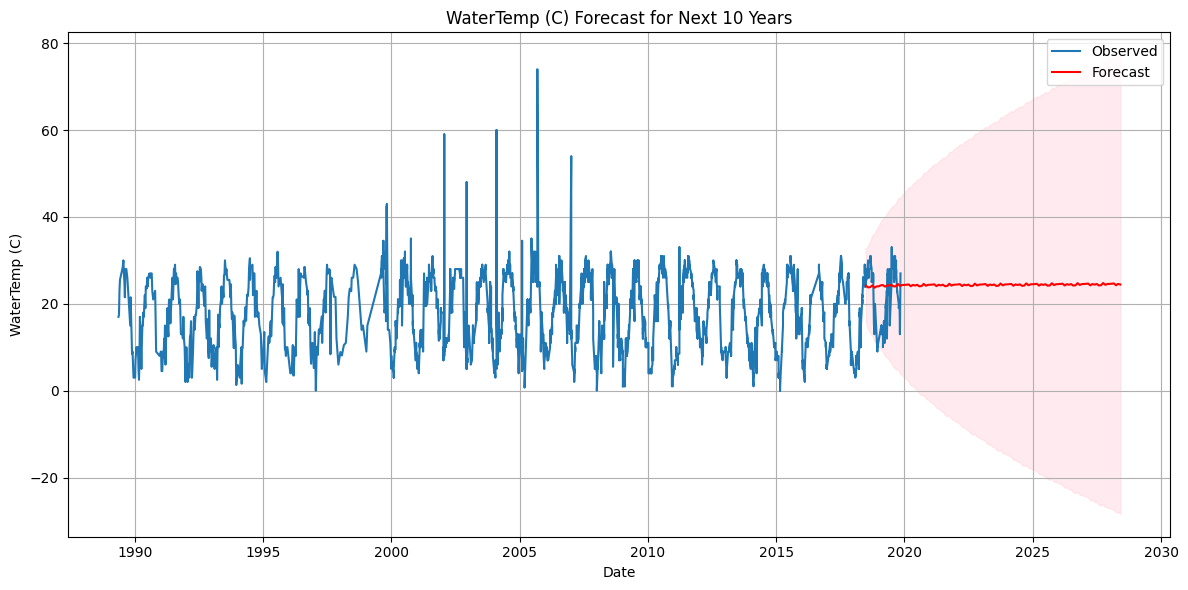

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


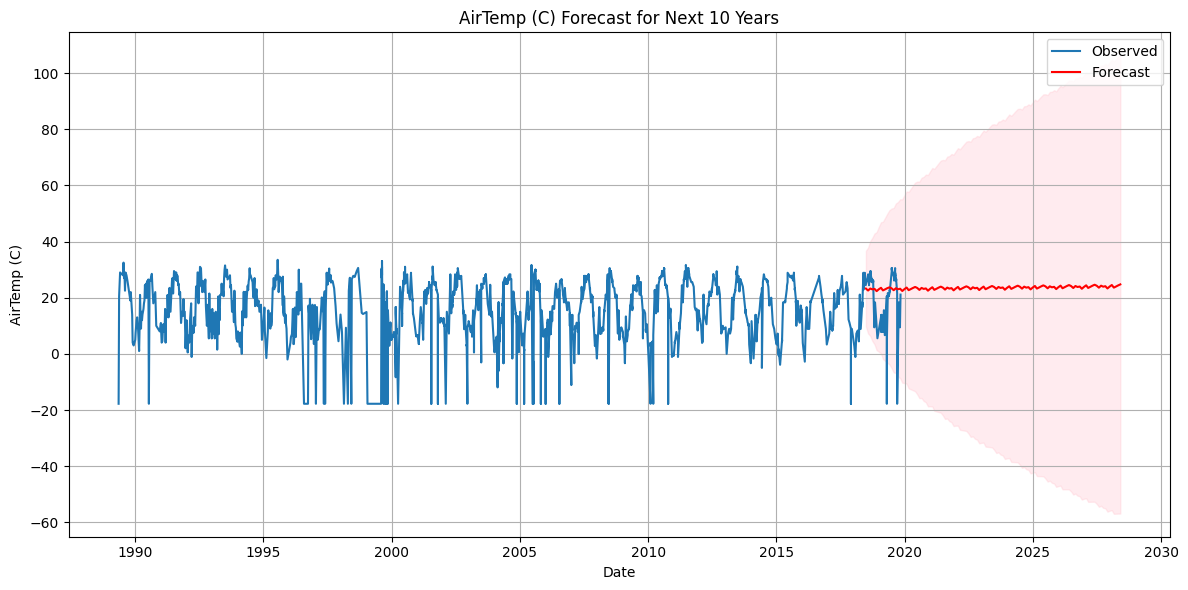

In [ ]:
def forecast_parameter(parameter):
    data = df[[parameter]].copy()

    # Split data into train and test sets
    train_data = data.iloc[:-120]  # Use data up to the last 120 months as training data (10 years)
    test_data = data.iloc[-120:]   # Use the last 120 months as test data

    # Fit SARIMA model
    order = (1, 1, 1)       # (p, d, q)
    seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Forecast for the next 120 months (10 years)
    forecast_steps = 120
    forecast = results.get_forecast(steps=forecast_steps)

    # Extracting forecasted values
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Adding date index for forecasted values
    forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
    forecast_mean.index = forecast_index
    forecast_ci.index = forecast_index

    # Plotting the forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[parameter], label='Observed')
    plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'{parameter} Forecast for Next 10 Years')
    plt.xlabel('Date')
    plt.ylabel(parameter)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Perform forecasting for each parameter
for parameter in parameters:
    forecast_parameter(parameter)


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('waterquality.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Fill missing values if any (optional)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Select the 'Salinity (ppt)' parameter for forecasting
parameter = 'Salinity (ppt)'
data = df[[parameter]].copy()


In [ ]:
# Split data into train and test sets
train_data = data.iloc[:-120]  # Use data up to the last 120 months as training data (10 years)
test_data = data.iloc[-120:]   # Use the last 120 months as test data

# Fit SARIMA model
order = (1, 1, 1)       # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Salinity (ppt)   No. Observations:                 2251
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2343.920
Date:                            Mon, 17 Jun 2024   AIC                           4697.839
Time:                                    23:56:37   BIC                           4726.406
Sample:                                         0   HQIC                          4708.269
                                           - 2251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0595      0.015      3.847      0.000       0.029       0.090
ma.L1         -0.7629      0.011   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


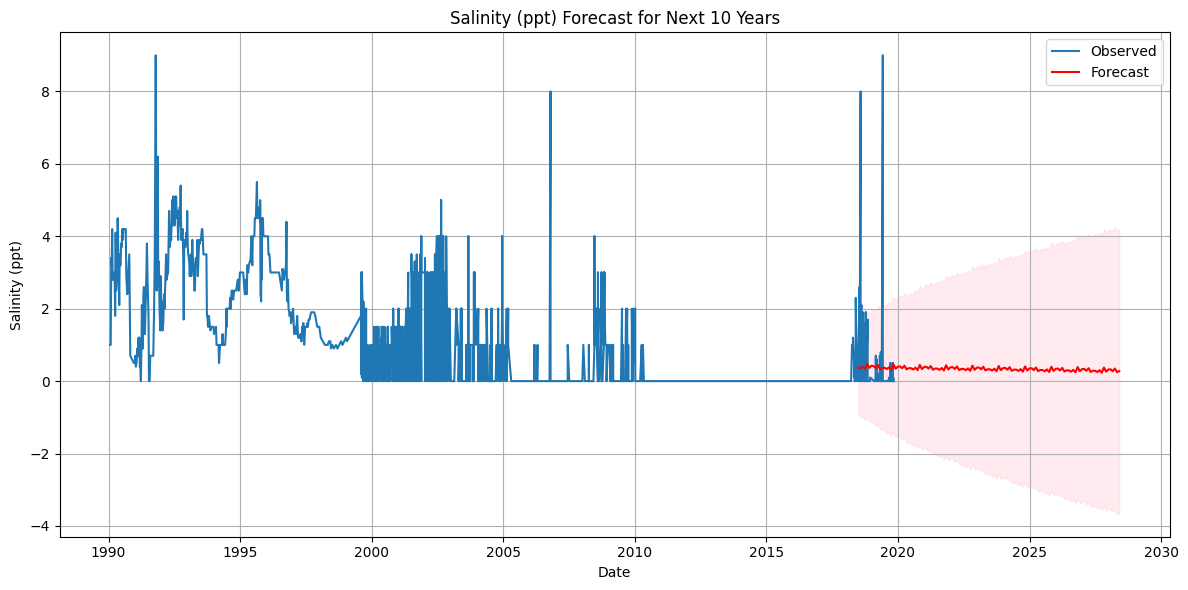

In [ ]:
# Forecast for the next 120 months (10 years)
forecast_steps = 120
forecast = results.get_forecast(steps=forecast_steps)

# Extracting forecasted values
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Adding date index for forecasted values
forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

# Plotting the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[parameter], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, color='r', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f'{parameter} Forecast for Next 10 Years')
plt.xlabel('Date')
plt.ylabel(parameter)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
